In [1]:
import matplotlib.pyplot as plt


In [25]:
id = '0x812D94b37e7e0A8B75B24F6dF46D266A3474409F'
int(id[2:], 16)

737476296667207926778244052146160272595213369503

In [3]:
import random
import math
import matplotlib.pyplot as plt
from samila import GenerativeImage, Projection

In [10]:
def f1(x,y):
    result = random.uniform(-1,1) * x ** 2 - math.sin(y**2) + abs(y-x)
    return result

In [18]:
def f2(x,y):
    result = random.uniform(-1,1) * y**3 - math.cos(x**2) + abs(x-y)
    return result

In [19]:
g = GenerativeImage(f1, f2)

In [20]:
g.generate(42)

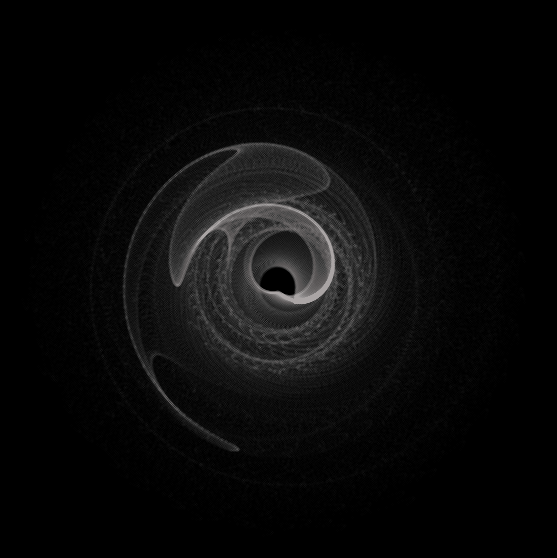

In [22]:
g.plot(projection = Projection.POLAR, color = 'snow', bgcolor = 'black')

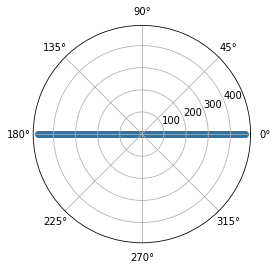

In [34]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute areas and colors
N = 150
ydata = np.array(range(N)) * np.pi


fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(ydata, ydata)

In [42]:
MAX_INT = int('F'*40,16)
MAX_INT

for i in str(MAX_INT):
    print(i,end='-')

1-4-6-1-5-0-1-6-3-7-3-3-0-9-0-2-9-1-8-2-0-3-6-8-4-8-3-2-7-1-6-2-8-3-0-1-9-6-5-5-9-3-2-5-4-2-9-7-5-

In [205]:
config= '1-4-6-1-5-0-1-6-3-7-3-3-0-9-0-2-9-1-8-2-0-3-6-8-4-8-3-2-7-1-6-2-8-3-0-1-9-6-5-5-9-3-2-5-4-2-9-7-5'.split('-')

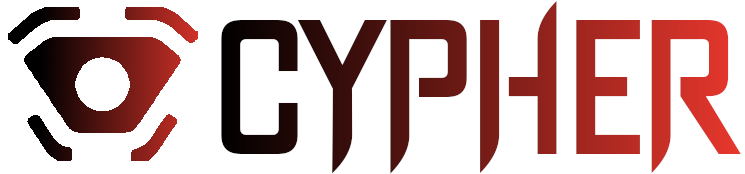

In [23]:
from PIL import Image

img = Image.open("Cypher.png")
pixels = list(img.getdata())

img

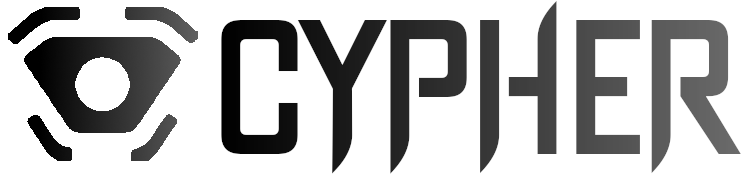

In [26]:
img.mode
image_gray = img.convert('LA')
image_gray

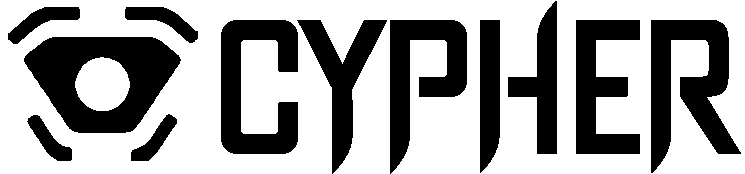

In [31]:
from PIL import Image

threshold = 250

# convert image to a list of pixels
img = Image.open("Cypher.png")
image_gray = img.convert('LA')

pixels = list(image_gray.getdata())

# convert data list to contain only black or white
newPixels = []
for pixel in pixels:
    # if looks like black, convert to black
    if pixel[0] <= threshold:
        newPixel = (0, 0, 0)
    # if looks like white, convert to white
    else:
        newPixel = (255, 255, 255)
    newPixels.append(newPixel)

# create a image and put data into it
newImg = Image.new(img.mode, img.size)
newImg.putdata(newPixels)
newImg

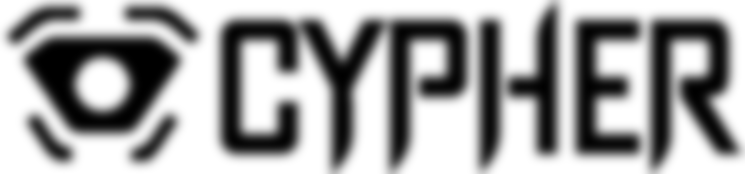

In [38]:
from PIL import ImageFilter
gaus = newImg.filter(ImageFilter.GaussianBlur(radius = 5))
gaus

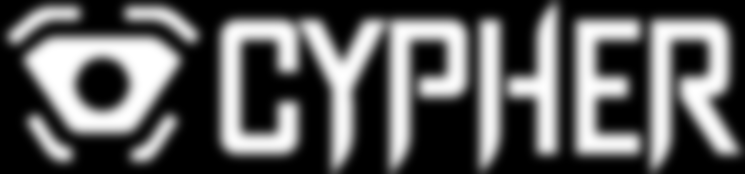

In [49]:
from PIL import Image, ImageOps

im_invert = ImageOps.invert(gaus.convert('RGB')).convert('L')
im_invert

In [50]:
import numpy as np

inv_data = np.array(im_invert.getdata())
inv_data[inv_data < 10] = 10
len(inv_data), im_invert.size, inv_data.shape


(129630, (745, 174), (129630,))

In [53]:
inv_data = np.reshape(inv_data,(174,745))
img = Image.fromarray( np.uint8(inv_data) , 'L')
img.size

(745, 174)

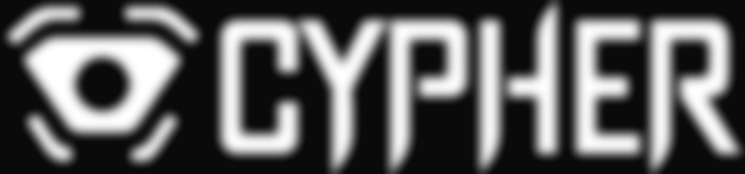

In [54]:
img


In [55]:
data = np.array(img.getdata())

In [59]:
img.save('mask.png')